# Titanic: Passenger Survival Predictions using Machine Learning

## Environment preparation and Data Ingestion

In this project, I will be looking at the famous 'Titanic' dataset, and testing various ML models in order to determine the best way to predict the outcome (survived/not-survived) of the passengers on board. The dataset used has been downloaded from Kaggle.com.


Some information on the data, as taken from the original source:

    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

    parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.


First, I will import the dataset and the necessary libraries for exploratory data analysis and modeling. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Reads in relevant train and test datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
#Combines train and test datasets into one large 'titanic' dataset
titanic = pd.concat([df_train, df_test], ignore_index=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Exploring Null values

There seem to be a number of null values in the 'Age' and 'Cabin' columns:

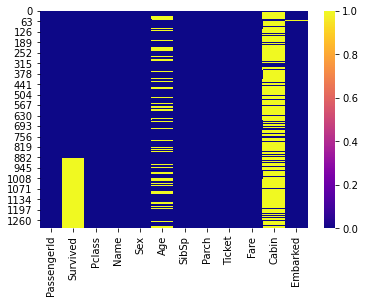

In [12]:
# Displays Heatmap of missing (null) data
sns.heatmap(titanic.isnull(), cmap = 'plasma')

In [13]:
# Displays % of missing data for 'Age' and 'Cabin' data
n = titanic.shape[0]

print('Missing from "Age":', (df_train.isnull()['Age'].sum()/n)*100, '%')
print('Missing from "Cabin":', (df_train.isnull()['Cabin'].sum()/n)*100, '%')

Missing from "Age": 13.521772345301757 %
Missing from "Cabin": 52.482811306340714 %


We also have 2 passengers who do not have entries for 'Embarked':

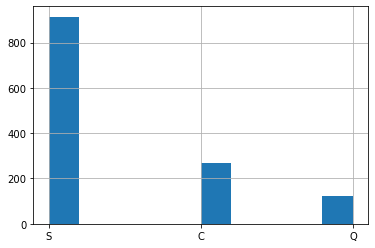

In [14]:
# Displays distribution of 'Embarked' data
titanic['Embarked'].hist()

In [15]:
# Displays passengers without 'Embarked' data
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


There is an argument for dropping these passengers all together, as we cannot be sure of their point of embarkation, and would always prefer not to introduce potentially flawed data into the model. Nevertheless due to the small number of nulls, and the potential loss of other information (as these passengers have no other null values), it would be best to estimate these as 'S', which is overwhelmingly the most likely point of embarkation.

In [16]:
# Replaces any missing 'Embarked' data with 'S' (Southampton)
titanic['Embarked'] = titanic['Embarked'].replace(np.nan, 'S', regex = False)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


There is also the 1 missing Fare entry that we will need to fill in. For this, we will just take the median 'Fare' value.

In [17]:
# Replaces missing 'Fare' value with median fare across all passengers.
titanic['Fare'] = titanic['Fare'].replace(np.nan, titanic['Fare'].median(), regex = False)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Going back to the Cabin, there is not enough data (around 50%) to provide any meaningful insight, although this data would likely be significant were it available. In order to not introduce rogue data, this information will be omitted from the primary model for the time being. 

As for the age, this will likely be a significant indicator of survival, so it will be necessary to fill in the nearly 14% of missing information. Although it would be possible to replace missing ages with the average values given some other indicator such as ticket price or class, it would be better to estimate these through a brief linear model, given the other indicators in the dataset. Before embarking on this, it would be best to do the rest of the data cleaning and any feature engineering, in case this might help calculation of these ages.

### Other feature engineering

One feature which is not currently useful is the 'Name' class, which could contain some data relating to class, status, or even ethnicity.

In [18]:
titanic['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

There are many ways in which the value of this data could be further explored through analysis on surnames, especially combined with embarkation point, which may provide some useful data around nationality or societal status. For this model, however, we will assume that gender is already defined in 'Sex', status is associated with ticket class, and nationality is not correlated with survival. We will therefore discard this information in the primary model, and revisit this if the model does not produce significantly useful results. 

The 'Sex' column is not useful in its current string format, so we will convert these to numerical identifiers through the get_dummies pandas method, and drop_first to avoid perfect correlation between the two resulting columns.

In [19]:
# Converts 'Sex' to binary identifier for Male
male = pd.get_dummies(titanic['Sex'], drop_first = True)
titanic = pd.concat([titanic, male], axis = 1)
titanic.rename({'male':'Male'}, axis= 1, inplace= True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


We will also do the same for the 'Embarked column':

In [20]:
# Converts 'Embarked' to a number of binary features 'Q' and 'S'
embarkations = pd.get_dummies(titanic['Embarked'], drop_first = True)
titanic = pd.concat([titanic, embarkations], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


We will also do this for the Pclass column, to remove any classification issues

In [21]:
# Converts 'Embarked' to a number of binary features '2nd Class' and '3rd Class'
class_dummies = pd.get_dummies(titanic['Pclass'], drop_first = True)
titanic = pd.concat([titanic, class_dummies], axis = 1)
titanic.rename({2:'2nd Class', 3:'3rd Class'}, axis = 1, inplace = True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Q,S,2nd Class,3rd Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,0,1,0,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0,0,0,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,0,1,0,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,0,1,0,1


### Inferring missing ages of passengers

In [22]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Q,S,2nd Class,3rd Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,1


The estimators to be used in predicting age are likely to be passenger class, number of siblings/spouses, number of parents/children, ticket fare, gender and embarkation point. We will take those passengers who do not have ages predicted out of the model estimation, and then subdivide the remaining passengers into a train/test split in order to establish and test a functioning model. We will then feed the data for those passengers missing an age into this model to estimate their age.

In [23]:
# Sets aside passengers without Age data
titanic_with_age = titanic[titanic['Age'].notnull()]

In [24]:
titanic_with_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1306
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1046 non-null   int64  
 1   Survived     714 non-null    float64
 2   Pclass       1046 non-null   int64  
 3   Name         1046 non-null   object 
 4   Sex          1046 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1046 non-null   int64  
 7   Parch        1046 non-null   int64  
 8   Ticket       1046 non-null   object 
 9   Fare         1046 non-null   float64
 10  Cabin        272 non-null    object 
 11  Embarked     1046 non-null   object 
 12  Male         1046 non-null   uint8  
 13  Q            1046 non-null   uint8  
 14  S            1046 non-null   uint8  
 15  2nd Class    1046 non-null   uint8  
 16  3rd Class    1046 non-null   uint8  
dtypes: float64(3), int64(4), object(5), uint8(5)
memory usage: 111.3+ KB


In [25]:
# Discards non-useful features and splits dataset into training and test sets
from sklearn.model_selection import train_test_split

X = titanic_with_age[['SibSp',
       'Parch', 'Fare', 'Male', 'Q', 'S', '2nd Class', '3rd Class']]
y = titanic_with_age['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

To evaluate the ages, I will use a linear regression model first, and evaluate the results of this.

In [27]:
# Instanciates a Linear Regression model, fits this to training data and then predicts ages of other passengers
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(X_train, y_train)
predictions = lrm.predict(X_test)

from sklearn.metrics import mean_squared_error

print('RSME = ', np.sqrt(mean_squared_error(y_test, predictions)))
coef = pd.DataFrame(lrm.coef_, index = X.columns, columns = ['Coeff']  )
coef

RSME =  12.891023075071406


,Coeff
SibSp,-3.268714
Parch,-0.344300
Fare,-0.008385
Male,2.755646
Q,4.869080
S,2.700778
2nd Class,-11.665088
3rd Class,-16.488806


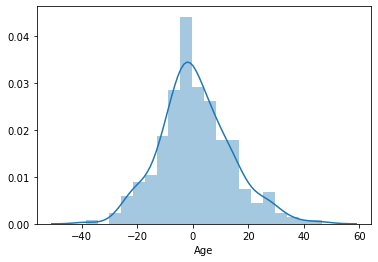

In [28]:
# Displays distribution of errors
sns.distplot(y_test-predictions)

Text(0.5, 1.05, 'Actual vs Predicted Age')

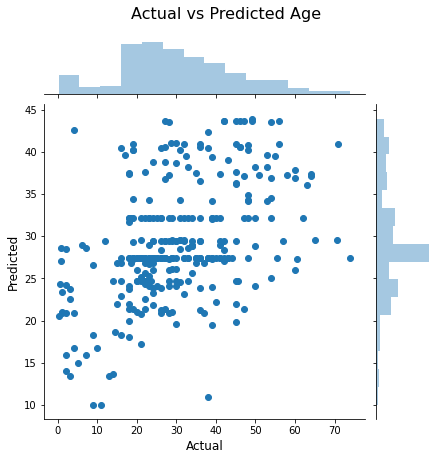

In [29]:
# Displays jointplot of Actual vs. Predicted age
jp = sns.jointplot(x= y_test, y= predictions, kind = 'scatter')
jp.set_axis_labels('Actual', 'Predicted', fontsize=12)
jp.fig.suptitle('Actual vs Predicted Age', y = 1.05, fontsize = 16)

This Regression model hasn't produced amazing results - the RMSE is around 12/13 years, which is rather unimpressive. However, the fact that the errors are (largely) normally distributed indicates that the choice of model isn't the issue. Therefore we could suppose that it is more likely due to the small dataset and lack of meaningful data. 

Due to the unnecessary complexity and poor outcomes from this model, we will therefore use a simple average instead, cross-referenced with Sex and Ticket Class to give more granular detail. It is worth mentioning that further analysis could likely also be done on the original 'Name' column to extract titles such as 'Mrs.' or 'Miss', and then cross-reference this with the average or median age of those groups in order to further increase the accuracy of these ages. For now, however, we will just use Gender and Ticket Class as differentiating factors.

In [30]:
#Sets each missing null value in the 'Age' column to the average value for that passenger's ticket class and gender.
grouped = titanic.groupby(['Pclass', 'Sex'])
titanic['Age'] = grouped['Age'].apply(lambda x: x.fillna(x.mean()))

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Male         1309 non-null   uint8  
 13  Q            1309 non-null   uint8  
 14  S            1309 non-null   uint8  
 15  2nd Class    1309 non-null   uint8  
 16  3rd Class    1309 non-null   uint8  
dtypes: float64(3), int64(4), object(5), uint8(5)
memory usage: 129.2+ KB


From visual inspection it would appear that using a model to impute the ages rather than a simple average results in higher bias, but a lower overall variance in results. As both methods are so close in their results, it would seem sensible to use the simpler average method which could be more easily applied if more data was to become available.

It is also worth mentioning that further analysis could be done on the original 'Name' column to extract titles such as 'Mrs.' or 'Miss', and then cross-reference this with the average or median age of those groups in order to increase the accuracy of these ages. However for now, this simple average will be used:

Finally, we will re-split the data into its original training and test sets, and assign the usable features to a subset X, to be used for the training of the LogReg model.

In [32]:
#Splits the whole titanic dataset back into its original training and testing datasets
df_train = titanic[titanic['Survived'].notnull()]
df_test = titanic[titanic['Survived'].isnull()]

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Male         891 non-null    uint8  
 13  Q            891 non-null    uint8  
 14  S            891 non-null    uint8  
 15  2nd Class    891 non-null    uint8  
 16  3rd Class    891 non-null    uint8  
dtypes: float64(3), int64(4), object(5), uint8(5)
memory usage: 94.8+ KB


In [34]:
#df_train and df_test subsets are stripped of non-useful features and put into new train and test subsets
titanicX_train = df_train[['Age', 'SibSp', 'Parch', 'Fare', 'Male', 'Q', 'S', '2nd Class', '3rd Class']]
titanicy_train = df_train['Survived'].astype('int')
titanicX_test = df_test[['Age', 'SibSp', 'Parch', 'Fare', 'Male', 'Q', 'S', '2nd Class', '3rd Class']]

Now that the data is clean and training/test sets are defined, we can move to modeling the data.

## Identifying the best model

In order to figure out which model is the best for predicting the survival rate, I will test 3 classic Classification models -  Logistic Regression, Random Forest and KNN - using only the titanicX_train and titanicy_train subsets (as the outcome of 'Survived' for these is already known). Once the best model has been identified, I will then use a Grid Search to identify the best parameters for the model, and use this model, fitted by the entire titanic_train subset, to predict the Survival data for the other 418 passengers.

For all of the following models, I will need to have a subdivided dataset, so I will be splitting the titanic_train set again into further X_train/test and y_train/test sets. Following this, titanicX_test (i.e. the relevant parts of the overall titanic test set) will not be used again until a final model is put together.

In [35]:
# Randomly splits titanic training data into smaller training and testing subsets (0.7/0.3 respectively)
X_train, X_test, y_train, y_test = train_test_split(titanicX_train, titanicy_train, test_size = 0.3, random_state = 100)

### Model 1: Logistic Regression

In [36]:
# Instanciates Logistic Regression model and fits to training data 
from sklearn.linear_model import LogisticRegression

Logreg = LogisticRegression(max_iter = 600)
Logreg.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [37]:
# Predicts survival rates from test data using Logistic Regression model
predictions = Logreg.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print ('LOGISTIC REGRESSION MODEL: \n')
print (classification_report(y_test, predictions))
print ('\n')
print (confusion_matrix(y_test, predictions))

LOGISTIC REGRESSION MODEL: 

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       159
           1       0.80      0.68      0.74       109

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



[[141  18]
 [ 35  74]]


Without any adjustments of the C variable, the overall accuracy of the model is 0.8, which is not a bad start! It's possible that this could be slightly higher with slightly tweaked parameters.

### Model 2: Random Forest

In [39]:
# Instanciates Random Forest model with 200 trees and fits to training data
from sklearn.ensemble import RandomForestClassifier

rfst = RandomForestClassifier(n_estimators = 200, random_state = 100)
rfst.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=100)

In [40]:
# Predicts survival rates from test data using RFST model
predictions = rfst.predict(X_test)

In [41]:
print ('RANDOM FOREST MODEL: \n')
print (classification_report(y_test, predictions))
print ('\n')
print (confusion_matrix(y_test, predictions))

RANDOM FOREST MODEL: 

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       159
           1       0.78      0.73      0.76       109

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



[[137  22]
 [ 29  80]]


This model, again without finely adjusted parameters, gives an overall accuracy of 81%, and seems to perform overall fractionally better than the original Logreg model. There are a number of reasons for this, most likely the fact that the outcome data is fairly skewed toward those who did not survive, and Random Forest Models are a little more adept at coping with this.

### Model 3: K Nearest Neighbours

As this model is modeled around distance between points in n-dimensions, it will be necessary to first scale the data using a Standard Scaler before an initial model is instanciated.

In [42]:
# Normalises titanic train and test data (features) using StandardScaler object
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [43]:
# Instanciates a KNN estimator and fits to training data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [44]:
# Predicts survival rates from test data using KNN model
predictions = knn.predict(scaled_X_test)

In [45]:
print ('KNN MODEL: \n')
print (classification_report(y_test, predictions))
print ('\n')
print (confusion_matrix(y_test, predictions))

KNN MODEL: 

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       159
           1       0.83      0.62      0.71       109

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268



[[145  14]
 [ 41  68]]


This model seems to perform fractionally worse than the other two models. However, as the n_neighbors parameter is so key to the functioning, it would be advisable to identify the best value here before any initial conclusion on model fit are reached. I will use the elbow method to do this, and to make things easier I will define the above as a function so it can be more easily called.

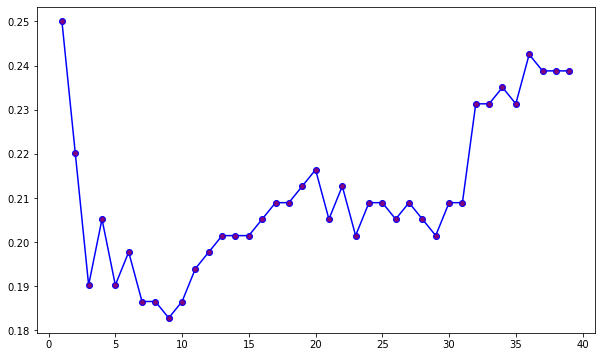

In [46]:
# Loops through i different KNN models, each with n_neighbors defined as i, and records the error rate for each
error = []

def instanceknn(i):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(scaled_X_train, y_train)
    return knn.predict(scaled_X_test)
    
for i in range (1, 40):
    predictions = instanceknn(i)
    error.append(np.mean(y_test != predictions))

# Plots error rates for each of the i KNN models.
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error, marker = 'o', markersize = 6, markerfacecolor= 'purple', color = 'blue')

From the errors given by each model with n_neighbors = i, the optimal number of neighbors for this model without any other changes would appear to be around 9, so we will reinstanciate and evaluate the model on this basis.

In [47]:
predictions = instanceknn(9)

print ('KNN MODEL: \n')
print (classification_report(y_test, predictions))
print ('\n')
print (confusion_matrix(y_test, predictions))

KNN MODEL: 

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       159
           1       0.83      0.69      0.75       109

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268



[[144  15]
 [ 34  75]]


This gives us an overall accuracy of 82%, which is actually a little better than the other models used. Although the differences here are fairly marginal, I will go ahead and use a GridSearch with the KNN model to further tweak parameters and improve performance overall. 

### Tweaking KNN for best performance

Now I will use a GridSearch on the KNN model to identify the best parameters given the entire training set. Once again, the data will be scaled, but this time as an entire training set. The same scaler will then be applied to the features in the test set (note: these are not re-combined for fitting the scaler, as this can cause test data information to impact upon the training of the model).

In [48]:
# Normalises titanic train and test data (features) using StandardScaler object
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
scaler.fit(titanicX_train)
scaled_titanicX_train = scaler.transform(titanicX_train)
scaled_titanicX_test = scaler.transform(titanicX_test)

# Parameters defined for GridSearch
param_grid = {
    'n_neighbors' : [i for i in range (3, 12)],
    'weights' : ['distance', 'uniform'],
    'metric' : ['euclidean', 'manhattan']
}

#New GridSearch instanciated and run with parameter values as above, KNN as the estimator (model)
gs = GridSearchCV(
    KNeighborsClassifier(), 
    param_grid,
    verbose = 1, 
    cv = 3,
    n_jobs = -1
)

results = gs.fit(scaled_titanicX_train, titanicy_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    1.3s finished


In [50]:
# Shows parameters of 'best-fit' model
results.best_params_

{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'uniform'}

According to the GridSearch results, the model performed best with n_neighbors equal to 8, and using uniform weighting, manhattan metrics. These are the parameters which will be used to train the final model, which will be used to extrapolate the survival of the remaining 418 passengers. 

In [51]:
# Instanciates a new KNN model with given parameters as 'knn_titanic'
knn_titanic = KNeighborsClassifier(n_neighbors = 8, metric = 'manhattan', weights = 'uniform')

## Modeling the unknown data

Finally, we will fit this model to the entire known dataset of 891 passengers, before using it to predict the fates of the other 418.

In [55]:
# Fits the above KNN model to the whole training data
knn_titanic.fit(scaled_titanicX_train, titanicy_train)

# Survival predictions for test data generated and set to a new DataFrame 'survivors'
survival_predictions = knn.predict(scaled_titanicX_test)
survivors = pd.DataFrame(survival_predictions, columns = ['Survived Predictions'])
survivors

,Survived Predictions
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


Now that the other passengers have been predicted to have survived or not, we'll add this back into the original titanic dataset to get an overview of all of the data together.

In [58]:
# Sets index of new survivors data in DataFrame to the same as those of missing passengers in the full 'titanic' dataset
survivors.index = range(891, 1309)

# Combines original Survival data with new predictions to give a full account of all (predicted) survival.
titanic['Survived'] = titanic['Survived'].combine_first(survivors['Survived Predictions']).astype('uint8')

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Q,S,2nd Class,3rd Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,25.962264,0,0,A.5. 3236,8.0500,NaN,S,1,0,1,0,1
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,0,0,0,0,0
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,0,1,0,1
1307,1308,0,3,"Ware, Mr. Frederick",male,25.962264,0,0,359309,8.0500,NaN,S,1,0,1,0,1


The above survival predictions, when compared to the original (actual) survival rates, were about 78% accurate (around 326 of the 418 outcomes were correctly predicted). Considering this is only a first pass at full prediction, and given the relatively small dataset and possible features to draw on, this is actually a pretty good result! Nevertheless, many documented attempts at this problem will reach around 82% accuracy (around 342 out of 418 outcomes correctly predicted), so there are clearly other factors to be considered. 

Before looking at these, I wanted to quickly check a similar implementation of a Random Forest Model using GridSearch to set the hyperparameters, just in case this produced a better overally result (which could vary due to using the titanicX_train set as a whole for fitting rather than just the X_train subset of this).

In [60]:
#Defines parameters and instanciate GridSearchCV based on Random Forest Classifier
params = {'n_estimators': [i for i in range (100, 800, 100)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [i for i in range (10, 100, 10)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]
               }

gs1 = GridSearchCV(
    RandomForestClassifier(), params, cv = 3, n_jobs = -1, verbose = 3 )

#Runs GridSearch using training data and cross-validates to identify best outcomes
rsft_gs1_results = gs1.fit(titanicX_train, titanicy_train)

Fitting 3 folds for each of 1260 candidates, totalling 3780 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3780 out of 3780 | elapsed:  8.8min finished


In [ ]:
# Shows parameters of best-fit model
rsft_gs1_results.best_params_

'''
Outcome shows:
max_features : 'auto',
min_samples_leaf = 1,
min_samples_split = 10,
n_estimators = 300
'''

In [88]:
# Instanciates model with 'best' parameters as defined above
rsft1 = RandomForestClassifier(max_depth = 40,
 max_features ='auto',
 min_samples_leaf = 1,
 min_samples_split = 10,
 n_estimators = 300)

#Fits model to train data
rsft1.fit(titanicX_train, titanicy_train)

# Predicts survivors using new RFST model
survivors = rsft1.predict(titanicX_test)

The above survival predictions, when compared to the original (actual) survival rates were about 77% accurate - actually a little worse than the KNN model. This would see to confirm that the greatest gains accuracy would be derived from looking at the initial data, rather than the model itself. 

## Potential adjustments for better model performance

So what elements would we look at adjusting, if we were to try to further improve upon the accuracy of the model?

Firstly, the 'Name' data wasn't used at all in the analysis. It is possible that using string methods, the title of the passenger could be extracted, which could correlate to that individual's socioeconomic class, marital status or even nationality, factors which could be statistically significant in determining survival. 

Secondly, the missing 'Age' values were calculated from the average ages of passengers in the same gender and ticket class. This could be improved by further dividing this by title, socioeconomic class or nationality (as derived above). This could potentially lead to more accurate predictions of age, and impact the overall model performance when predicting survival.

Finally, the 'Cabin' data wasn't used at all, due to the many missing values. There would be a few ways that this data could have been useful - for example, research could be done to find out cabin location based on the cabin number - how far is this from the bow/stern of the ship? How long would it take to reach a lifeboat from this location? However, due to the many missing values, we would have to accept the potential for misinformation in assuming (or trying to impute) the other missing cabins, which could cause as much harm as good to the overall dataset if incorrectly incorporated.